# **Final Project: Checkpoint 2**
(5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c) organize (e.g., set up a database or a pandas DataFrame).

(20 points) Basic data exploration and summary statistics
 - You must present three conclusions using at least three different statistical
methods including hypothesis testing.
    - For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.
 - For each method, you must have at least one gorgeous plot.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# https://www.fec.gov/data/candidates/president/presidential-map/ 
# spending - allcandidates 
types = {
    "cmte_id" : str,
    "cand_id" : str,
    "recipient_nm" : str,
    "disb_amt" : float,
    "disb_dt" : str,
    "recipient_city" : str,
    "recipient_st" : str,
    "recipient_zip" : str,
    "disb_desc" : str,
    "memo_cd" : str,
    "memo_text" : str,
    "form_tp" : str,
    "file_num" : str,
    "tran_id" : str,
    "election_tp" : str
}

spending_df = pd.read_csv("spending_data.csv", index_col=False, dtype=types)
spending_df["disb_dt"] = pd.to_datetime(spending_df["disb_dt"], format='%d-%b-%y')
spending_df

,cmte_id,cand_id,cand_nm,recipient_nm,disb_amt,disb_dt,recipient_city,recipient_st,recipient_zip,disb_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00540302,P40012155,"Scott, Timothy E.",THREE ARBOR INSURANCE INC,26630.07,2023-08-31,VESTAVIA,AL,35243,INSURANCE,NaN,NaN,SB23,1731524,SB23.960154,P2024
1,C00540302,P40012155,"Scott, Timothy E.",THREE ARBOR INSURANCE INC,10342.13,2023-09-15,VESTAVIA,AL,35243,INSURANCE,NaN,NaN,SB23,1731524,SB23.960155,P2024
2,C00540302,P40012155,"Scott, Timothy E.",WALMART,10.60,2023-06-28,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.951080.003,P2024
3,C00540302,P40012155,"Scott, Timothy E.",WALMART,152.88,2023-09-15,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.966491.284,P2024
4,C00540302,P40012155,"Scott, Timothy E.",WALMART,218.00,2023-09-15,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.966491.285,P2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112107,C00867812,P40019218,"Terry, Randal Allan",MOUNT JACKSON TRUCK CENTER,219.11,2024-07-29,MOUNT JACKSON,VA,22842,FOOD/SHOWERS,NaN,NaN,SB23,1812531,SB23.6419,G2024
112108,C00867812,P40019218,"Terry, Randal Allan",SWEETWATER TAVERN,215.41,2024-08-08,CENTREVILLE,WA,20121,FOOD,NaN,NaN,SB23,1816947,SB23.6524,G2024
112109,C00867812,P40019218,"Terry, Randal Allan","GABRIEL, MARK",153.75,2024-06-30,APPLETON,WI,54915,FUND RAISING,NaN,NaN,SB23,1804884,SB23.5890,G2024
112110,C00867812,P40019218,"Terry, Randal Allan","GABRIEL, MARK",316.25,2024-08-01,APPLETON,WI,54915,FUNDRAISING,NaN,NaN,SB23,1816947,SB23.6464,G2024


In [36]:

cand_info = pd.read_csv("weball24.txt", delimiter='|')
cand_info

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H2AK00200,"CONSTANT, CHRISTOPHER",C,1,DEM,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,09/30/2024,0.00,0.00
1,H2AK01158,"PELTOLA, MARY",I,1,DEM,10668705.84,617668.60,8324352.37,0.00,691260.30,...,NaN,NaN,NaN,NaN,NaN,1385214.20,7208.83,09/30/2024,112286.11,2500.00
2,H2AK00226,"PALIN, SARAH",O,2,REP,3866.49,0.00,50246.07,0.00,46379.58,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,03/31/2023,-9152.50,0.00
3,H2AK01083,"BEGICH, NICHOLAS III",C,2,REP,1789869.45,112470.80,1390345.73,17659.66,41233.99,...,NaN,NaN,NaN,NaN,NaN,117050.00,5000.00,09/30/2024,10535.00,0.00
4,H4AK00156,"DAHLSTROM, NANCY",C,2,REP,982395.15,423333.44,781568.25,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,262916.02,0.00,09/30/2024,3135.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,S4WV00423,"LINDSAY, DONALD",O,2,REP,9792.33,0.00,9792.33,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,06/30/2024,0.00,0.00
3793,S4WY00188,"MORROW, SCOTT D MR",C,1,DEM,36054.82,0.00,4439.65,2200.00,0.00,...,NaN,NaN,NaN,NaN,NaN,5000.00,1000.00,09/30/2024,0.00,0.00
3794,S0WY00137,"LUMMIS, CYNTHIA MARIE MRS.",I,2,REP,546175.07,111073.95,195781.29,5000.00,115856.76,...,NaN,NaN,NaN,NaN,NaN,220084.83,0.00,09/30/2024,8850.00,0.00
3795,S4WY00162,"RASNER, REID",C,2,REP,1304150.64,0.00,1294697.64,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,09/30/2024,0.00,0.00


In [37]:

poll_data = pd.read_csv("presidential_general_averages.csv")
poll_data["date"] = pd.to_datetime(poll_data["date"])
poll_data

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo
0,Joseph R. Biden Jr.,2020-11-03,37.82732,Alabama,2020,NaN,NaN,NaN,NaN
1,Donald Trump,2020-11-03,57.36126,Alabama,2020,NaN,NaN,NaN,NaN
2,Joseph R. Biden Jr.,2020-11-02,37.82732,Alabama,2020,NaN,NaN,NaN,NaN
3,Donald Trump,2020-11-02,57.36126,Alabama,2020,NaN,NaN,NaN,NaN
4,Joseph R. Biden Jr.,2020-11-01,38.07011,Alabama,2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28526,Kennedy,2024-03-02,NaN,Wisconsin,2024,IND,10.28615,12.852725,7.514286
28527,Biden,2024-03-02,NaN,Wisconsin,2024,DEM,38.73255,41.180613,36.214855
28528,Trump,2024-03-01,NaN,Wisconsin,2024,REP,41.58205,43.986072,39.224702
28529,Kennedy,2024-03-01,NaN,Wisconsin,2024,IND,10.30900,13.044215,7.668578


# Correlation Between Trump's and Harris's Total Spending and National Polling Average

In [38]:
# Add column to poll_data with state abbreviations 
states_abbr = spending_df.recipient_st.unique()
states_abbr

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'IL',
       'IN', 'LA', 'MA', 'MD', 'ME', 'MN', 'MO', 'NC', 'NE', 'NH', 'NJ',
       'NY', 'OK', 'PA', 'SC', 'TN', 'TX', 'VA', 'VI', 'WA', 'WI', 'WY',
       'ZZ', 'OH', 'WV', 'AK', 'AS', 'DE', 'HI', 'ID', 'KS', 'KY', 'MI',
       'MP', 'MS', 'MT', 'ND', 'NM', 'NV', 'OR', 'RI', 'UT', 'VT', 'GU',
       'PR', 'SD', 'AB', 'GB', 'ON', 'AU', 'C', 'F', 'G', 'I', 'N', 'QC',
       'T', 'TH', 'UK', 'W', 'AA'], dtype=object)

In [39]:
state_abbrvs = pd.read_csv("states.csv", index_col = 0)
state_abbrvs.head()

,Abbreviation
State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [40]:
states = poll_data.state.unique()
[s for s in states if s not in state_abbrvs["Abbreviation"]]

['ME-1', 'ME-2', 'National', 'NE-2', 'Nebraska Cd 2']

In [41]:
abbrvs = list()

for s in poll_data["state"]:
    if (s == 'ME-1') | (s == 'ME-2'):
        abbrvs.append("ME")
    elif s == "NE-2":
        abbrvs.append("NE")
    elif s == "Nebraska Cd 2":
        abbrvs.append("NE")
    elif s == "National":
        abbrvs.append("National")
    else:
        abbrvs.append(state_abbrvs["Abbreviation"][s])
    
poll_data["state_abbrv"] = abbrvs
poll_data

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo,state_abbrv
0,Joseph R. Biden Jr.,2020-11-03,37.82732,Alabama,2020,NaN,NaN,NaN,NaN,AL
1,Donald Trump,2020-11-03,57.36126,Alabama,2020,NaN,NaN,NaN,NaN,AL
2,Joseph R. Biden Jr.,2020-11-02,37.82732,Alabama,2020,NaN,NaN,NaN,NaN,AL
3,Donald Trump,2020-11-02,57.36126,Alabama,2020,NaN,NaN,NaN,NaN,AL
4,Joseph R. Biden Jr.,2020-11-01,38.07011,Alabama,2020,NaN,NaN,NaN,NaN,AL
...,...,...,...,...,...,...,...,...,...,...
28526,Kennedy,2024-03-02,NaN,Wisconsin,2024,IND,10.28615,12.852725,7.514286,WI
28527,Biden,2024-03-02,NaN,Wisconsin,2024,DEM,38.73255,41.180613,36.214855,WI
28528,Trump,2024-03-01,NaN,Wisconsin,2024,REP,41.58205,43.986072,39.224702,WI
28529,Kennedy,2024-03-01,NaN,Wisconsin,2024,IND,10.30900,13.044215,7.668578,WI


In [42]:
harris_spending_23_24 = spending_df[spending_df["cand_nm"] == "Harris, Kamala"]
hs_spending_per_day = harris_spending_23_24.groupby("disb_dt")["disb_amt"].sum()
hs_spending_per_day

disb_dt
2023-03-14         500.00
2023-03-19         226.80
2023-03-25         115.00
2023-03-30         777.60
2023-04-01         170.90
                 ...     
2024-08-27     1441875.15
2024-08-28     5226835.86
2024-08-29     3167356.18
2024-08-30    10198391.82
2024-08-31      319079.56
Name: disb_amt, Length: 468, dtype: float64

In [139]:
harris_spending_23_24 = spending_df[spending_df["cand_nm"] == "Harris, Kamala"]
hs_spending_per_day_per_state = harris_spending_23_24.groupby(["recipient_st","disb_dt"])["disb_amt"].sum()
hs_spending_per_day_per_state_df = pd.DataFrame(index = hs_spending_per_day_per_state.index.get_level_values("disb_dt").unique(), columns = hs_spending_per_day_per_state.index.get_level_values("recipient_st").unique())

for st in hs_spending_per_day_per_state_df.columns:
    hs_spending_per_day_per_state_df[st] = hs_spending_per_day_per_state[st]

hs_spending_per_day_per_state_df =hs_spending_per_day_per_state_df.fillna(0)
hs_spending_per_day_per_state_df 

recipient_st,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,ZZ
disb_dt,,,,,,,,,,,,,,,,,,,,,
2023-11-02,2500.0,2500.00,0.0,2500.0,0.0,46.53,0.0,0.0,5252.44,3922.56,...,0.0,0.00,0.0,0.0,0.0,6410.40,0.0,0.0,0.0,0.0
2023-10-24,0.0,245.06,0.0,0.0,0.0,0.00,0.0,0.0,-10.22,223.93,...,0.0,0.00,0.0,0.0,0.0,21.00,0.0,0.0,0.0,0.0
2023-11-10,0.0,77.46,0.0,0.0,0.0,63.77,0.0,0.0,343.00,0.00,...,0.0,0.00,0.0,0.0,0.0,42.00,0.0,0.0,0.0,0.0
2023-12-06,0.0,1038.08,0.0,0.0,0.0,2481.35,0.0,0.0,460.22,0.00,...,0.0,0.00,0.0,0.0,0.0,144.90,0.0,0.0,0.0,0.0
2023-12-09,0.0,784.29,0.0,0.0,0.0,0.00,0.0,0.0,542.55,0.00,...,0.0,0.00,0.0,0.0,0.0,35.00,0.0,0.0,0.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,667.80,0.0,0.0,0.0,4873.11,0.0,0.0,0.0,0.0
2023-08-14,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,725.89,0.0,0.0,0.0,16.00,0.0,0.0,0.0,0.0
2023-04-02,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,4856.94,0.0,0.0,0.0,0.0


In [61]:
trump_spending_23_24 = spending_df[(spending_df["cand_nm"] == "Trump, Donald J.")]
tp_spending_per_day = trump_spending_23_24.groupby("disb_dt")["disb_amt"].sum()
tp_spending_per_day

disb_dt
2022-11-05        509.34
2022-11-09        328.18
2022-11-12        208.61
2022-11-13       4255.42
2022-11-14        179.55
                 ...    
2024-08-27    1522598.71
2024-08-28       6214.74
2024-08-29    3538242.71
2024-08-30     106979.83
2033-06-11         80.76
Name: disb_amt, Length: 623, dtype: float64

In [138]:
trump_spending_23_24 = spending_df[spending_df["cand_nm"] == "Trump, Donald J."]
tp_spending_per_day_per_state = trump_spending_23_24.groupby(["recipient_st","disb_dt"])["disb_amt"].sum()
tp_spending_per_day_per_state_df = pd.DataFrame(index = tp_spending_per_day_per_state.index.get_level_values("disb_dt").unique(), columns = tp_spending_per_day_per_state.index.get_level_values("recipient_st").unique())

for st in tp_spending_per_day_per_state_df.columns:
    tp_spending_per_day_per_state_df[st] = tp_spending_per_day_per_state[st]
tp_spending_per_day_per_state_df = tp_spending_per_day_per_state_df.fillna(0)    
tp_spending_per_day_per_state_df.head() 

recipient_st,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TX,UT,VA,VI,VT,WA,WI,WV,WY,ZZ
disb_dt,,,,,,,,,,,,,,,,,,,,,
2024-01-03,2500.0,0.0,190.83,0.0,0.0,1800.00,0.0,0.0,0.00,0.0,...,924.51,0.0,30127.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2023-04-28,0.0,7000.0,0.00,0.0,0.0,149.70,0.0,0.0,6009.65,0.0,...,21573.27,0.0,153415.86,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2023-07-26,0.0,6000.0,163.68,0.0,0.0,228.44,0.0,0.0,769.00,0.0,...,3341.91,0.0,18958.16,0.0,0.0,746.86,0.0,0.0,0.0,0.0
2023-08-25,0.0,3000.0,0.00,0.0,0.0,27.07,0.0,0.0,30000.00,0.0,...,1647.75,0.0,56080.38,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2023-10-18,0.0,20000.0,116.63,0.0,0.0,266.80,0.0,0.0,26.00,0.0,...,2952.66,0.0,75365.70,0.0,0.0,-15.84,0.0,0.0,0.0,0.0


In [44]:
harris_nat_polls = poll_data[(poll_data["candidate"] == "Harris") & (poll_data["state"] == "National")]
harris_nat_polls

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo,state_abbrv
22410,Harris,2024-10-18,NaN,National,2024,DEM,48.31895,49.199305,47.439490,National
22412,Harris,2024-10-17,NaN,National,2024,DEM,48.51015,49.395225,47.663125,National
22414,Harris,2024-10-16,NaN,National,2024,DEM,48.52620,49.375730,47.599215,National
22416,Harris,2024-10-15,NaN,National,2024,DEM,48.46265,49.366625,47.638852,National
22418,Harris,2024-10-14,NaN,National,2024,DEM,48.53800,49.501798,47.588855,National
...,...,...,...,...,...,...,...,...,...,...
22601,Harris,2024-07-28,NaN,National,2024,DEM,44.29690,45.448500,43.147647,National
22604,Harris,2024-07-27,NaN,National,2024,DEM,44.21675,45.435407,43.049853,National
22607,Harris,2024-07-26,NaN,National,2024,DEM,44.15055,45.262408,42.965415,National
22610,Harris,2024-07-25,NaN,National,2024,DEM,44.63285,45.854838,43.497355,National


In [71]:
trump_nat_polls = poll_data[(poll_data["candidate"] == "Trump") & (poll_data["state"] == "National")]
trump_nat_polls.head()

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo,state_abbrv
22409,Trump,2024-10-18,NaN,National,2024,REP,46.32675,47.102495,45.533325,National
22411,Trump,2024-10-17,NaN,National,2024,REP,46.14575,46.989202,45.372492,National
22413,Trump,2024-10-16,NaN,National,2024,REP,46.14220,46.911217,45.345485,National
22415,Trump,2024-10-15,NaN,National,2024,REP,46.06800,46.853055,45.262075,National
22417,Trump,2024-10-14,NaN,National,2024,REP,46.10375,46.893855,45.225875,National


In [96]:
trump_spending_to_polls = trump_nat_polls[["date", "pct_estimate"]].set_index("date")
trump_spending_to_polls = trump_spending_to_polls[trump_spending_to_polls.index.isin(tp_spending_per_day.index)]
trump_spending_to_polls["total_spending"] = tp_spending_per_day
trump_spending_to_polls

,pct_estimate,total_spending
date,,
2024-08-30,44.56450,106979.83
2024-08-29,44.31815,3538242.71
2024-08-28,43.84830,6214.74
2024-08-27,43.81825,1522598.71
2024-08-26,43.80870,62936.80
...,...,...
2024-03-05,42.22820,459425.66
2024-03-04,42.20815,19956.91
2024-03-03,42.18145,35809.56


In [69]:
harris_spending_to_polls = harris_nat_polls[["date", "pct_estimate"]].set_index("date")
harris_spending_to_polls = harris_spending_to_polls[harris_spending_to_polls.index.isin(hs_spending_per_day.index)]
harris_spending_to_polls["total_spending"] = hs_spending_per_day
harris_spending_to_polls.head()

,pct_estimate,total_spending
date,,
2024-08-31,47.82425,319079.56
2024-08-30,47.73955,10198391.82
2024-08-29,47.67195,3167356.18
2024-08-28,47.32900,5226835.86
2024-08-27,47.16775,1441875.15


In [50]:
harris_corr_mtx = harris_spending_to_polls.corr(method="spearman")
harris_corr_mtx

,pct_estimate,total_spending
pct_estimate,1.000000,0.126721
total_spending,0.126721,1.000000


In [51]:
trump_corr_mtx = trump_spending_to_polls.corr(method="spearman")
trump_corr_mtx

,pct_estimate,total_spending
pct_estimate,1.000000,-0.038858
total_spending,-0.038858,1.000000


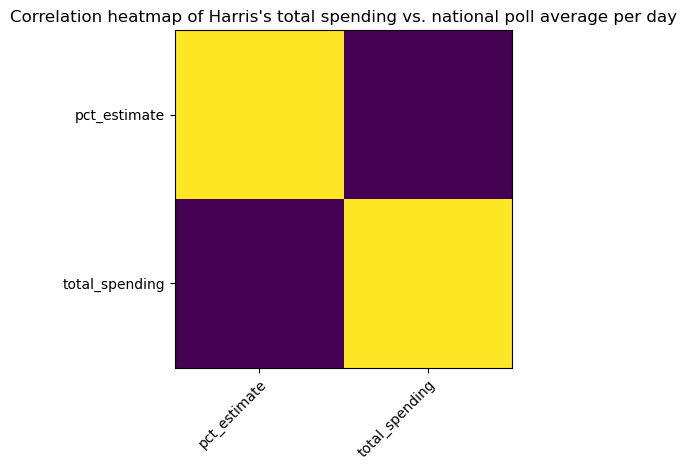

In [52]:
fig, ax = plt.subplots()
im = ax.imshow(harris_corr_mtx)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(2), labels=harris_corr_mtx.index)
ax.set_yticks(range(2), labels=harris_corr_mtx.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Correlation heatmap of Harris's total spending vs. national poll average per day")
fig.tight_layout()
plt.show()

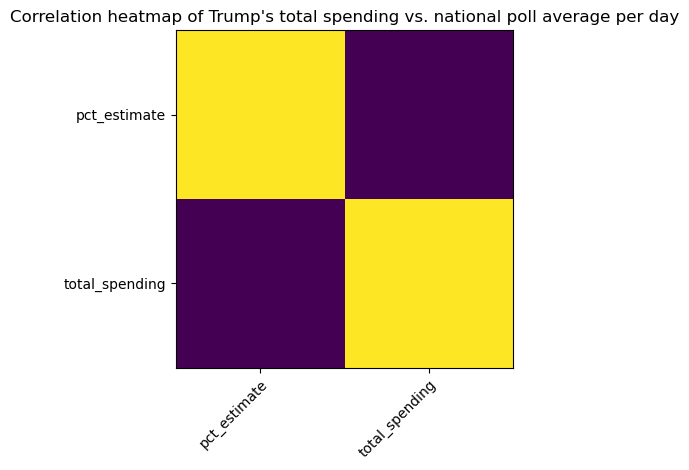

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(trump_corr_mtx)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(2), labels=trump_corr_mtx.index)
ax.set_yticks(range(2), labels=trump_corr_mtx.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Correlation heatmap of Trump's total spending vs. national poll average per day")
fig.tight_layout()
plt.show()

In [163]:
harris_corr_mtx = hs_spending_per_day_per_state_df.corr(method="spearman") 

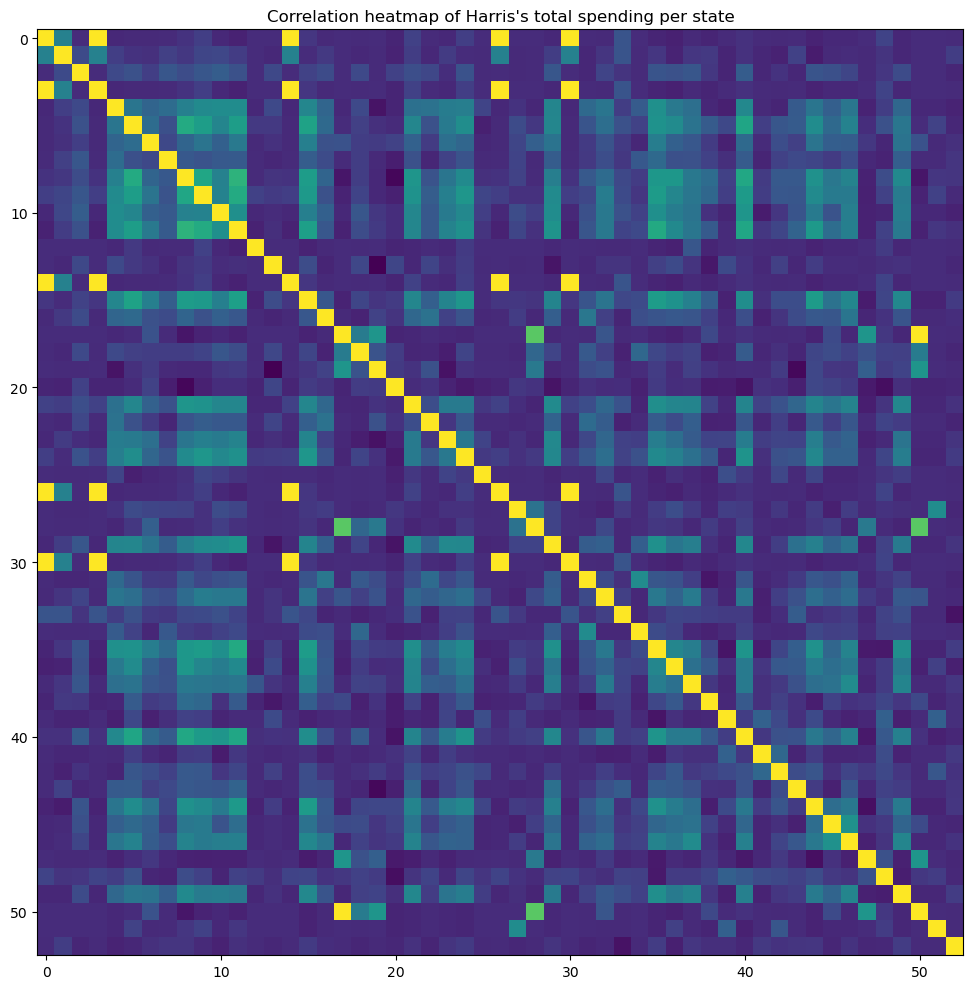

<Figure size 100000x100000 with 0 Axes>

In [164]:
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(harris_corr_mtx)

# Show all ticks and label them with the respective list entries
#ax.set_xticks(range(len(harris_corr_mtx.index)), labels=harris_corr_mtx.index, fontsize=10)
#ax.set_yticks(range(len(harris_corr_mtx.columns)), labels=harris_corr_mtx.columns, fontsize=10)

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
#         rotation_mode="anchor")
plt.figure(figsize=(1000,1000))

ax.set_title("Correlation heatmap of Harris's total spending per state")
fig.tight_layout()
plt.show()

In [165]:
trump_corr_mtx = tp_spending_per_day_per_state_df.corr(method="spearman")

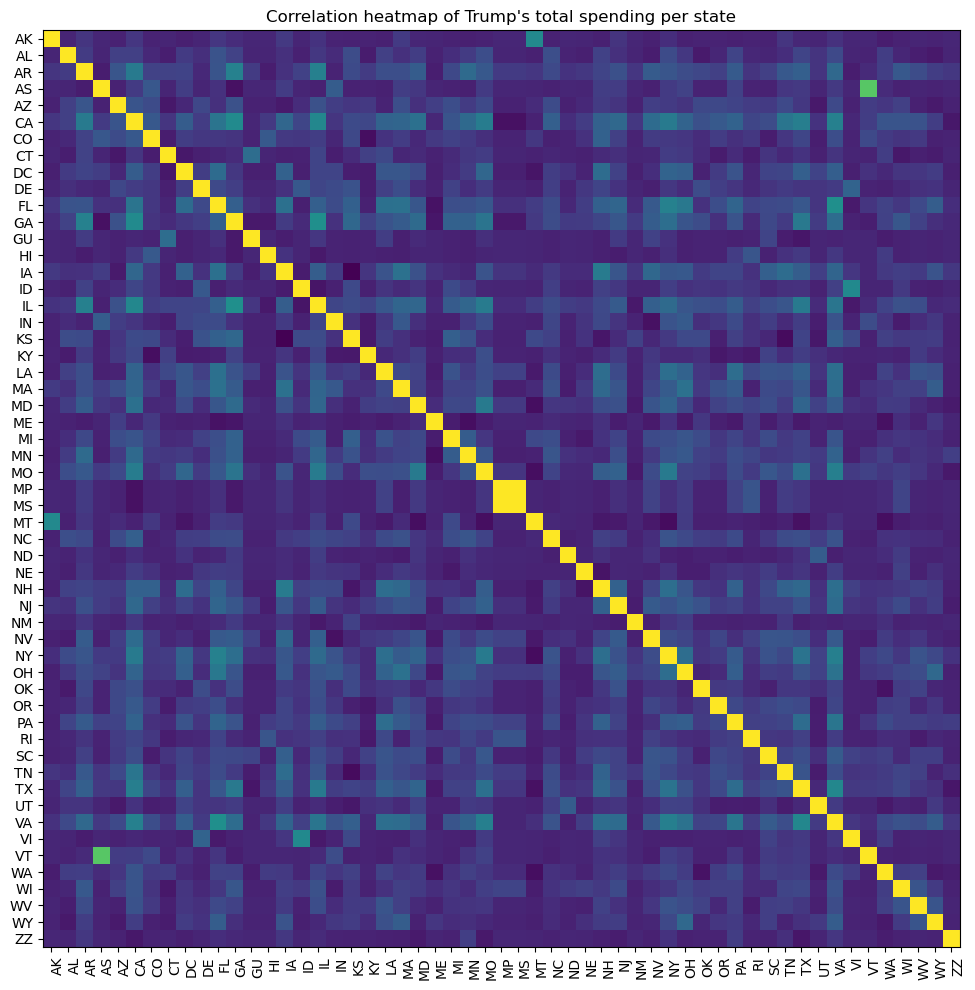

In [166]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(trump_corr_mtx)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(55), labels=trump_corr_mtx.index, fontsize=10)
ax.set_yticks(range(55), labels=trump_corr_mtx.columns, fontsize=10)

#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

ax.set_title("Correlation heatmap of Trump's total spending per state")
fig.tight_layout()
plt.show()

In [ ]:
# Analysis
# When discovering the correlation between estimated poll and total spending, Spearman correlation is applied due to the unknown nature of the relationship.
# Harris' stats present a weak positive correlation between her spending and her estimated poll.
# This implies that the increased spending have little impact on her polling performance.
# Trump's stats present a weak negative correlation between his spending and his estimated poll.
# This implies that the increased spending wouldn't likely to impact on his polling performance or have slight negative impact.
# Harris have benefits little from the spending, while trump didn't. This may impies that Trump have more solid brand recognition than Harris.
# Volters volt Trump dispite his spending. While Harris may need to spend more to gain public recognition. 
# The spending of both candidates presents low impact on the result.
# This may implies that officially count spending is not the primary factor that influence the poll.
# External influences like support from public celebrities (e.g. Elon Musk/Taylor Swift) or donation to Pro-Trump, Pro-Harris Committee impact more. 
# Another possible reason is that some states are Pro-Democrates or Pro-Republics by default. Both candidates may spend more at states that oppose with their party and receive relatively weak response.

# For the correlation between spending of each states, The presence of more green clusters on Harris’s heatmap compared to Trump’s indicates that Harris's state-level spending patterns are more correlated across multiple states.
# This implies that Harris have more consistent spending strategy across states. Her spending may be more universal across multiple states.
# On the opposite, Trump's spending may be more targeted, focusing on specific states independently with different priorities.
# Trump may allocate resources opportunistically, depending on shifting poll numbers or last-minute campaign needs, leading to less consistency in spending patterns.